# Objective: To identify and analyze disparities in access to essential amenities across Indian districts, and to profile districts based on their amenity access.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading and initial exploration

In [ ]:
df = pd.read_csv('/content/drive/My Drive/NFHS_5_India_Districts_Factsheet_Data.csv')

In [ ]:
df.head()

,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,Nicobars,Andaman & Nicobar Islands,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,North & Middle Andaman,Andaman & Nicobar Islands,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,South Andaman,Andaman & Nicobar Islands,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,Srikakulam,Andhra Pradesh,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,Vizianagaram,Andhra Pradesh,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Columns: 109 entries, District Names to Men age 15 years and above who consume alcohol (%)
dtypes: float64(54), int64(4), object(51)
memory usage: 602.2+ KB


In [ ]:
df.isnull().sum()

,0
District Names,0
State/UT,0
Number of Households surveyed,0
Number of Women age 15-49 years interviewed,0
Number of Men age 15-54 years interviewed,0
...,...
Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),0
Women age 15 years and above who use any kind of tobacco (%),0
Men age 15 years and above who use any kind of tobacco (%),0
Women age 15 years and above who consume alcohol (%),0


In [ ]:
df['District Names'].nunique()

699

In [ ]:
df['State/UT'].nunique()

36

## Data Selection and Preprocessing

In [ ]:
amenity_cols = [
    'Population living in households with electricity (%)',
    'Population living in households with an improved drinking-water source1 (%)',
    'Population living in households that use an improved sanitation facility2 (%)',
    'Households using clean fuel for cooking3 (%)'
]
literacy_col = 'Women (age 15-49) who are literate4 (%)'
relevant_cols=['District Names', 'State/UT']+amenity_cols+[literacy_col]

In [ ]:
rename_dict = {
    'Population living in households with electricity (%)': 'Electricity_Pct',
    'Population living in households with an improved drinking-water source1 (%)': 'Improved_Water_Pct',
    'Population living in households that use an improved sanitation facility2 (%)': 'Improved_Sanitation_Pct',
    'Households using clean fuel for cooking3 (%)': 'Clean_Cooking_Fuel_Pct',
    'Women (age 15-49) who are literate4 (%)': 'Female_Literacy_Pct'
}

In [ ]:
df_selected = df[relevant_cols].copy()
df_selected.rename(columns=rename_dict, inplace=True)

df_selected.head()

,District Names,State/UT,Electricity_Pct,Improved_Water_Pct,Improved_Sanitation_Pct,Clean_Cooking_Fuel_Pct,Female_Literacy_Pct
0,Nicobars,Andaman & Nicobar Islands,97.9,98.8,83.5,56.9,87.5
1,North & Middle Andaman,Andaman & Nicobar Islands,93.2,92.2,86.4,61.3,84.0
2,South Andaman,Andaman & Nicobar Islands,99.6,97.9,89.3,91.9,86.7
3,Srikakulam,Andhra Pradesh,99.9,87.7,71.6,74.7,64.3
4,Vizianagaram,Andhra Pradesh,99.5,93.1,61.7,60.3,58.3


In [ ]:
cols_to_convert = ['Electricity_Pct', 'Improved_Water_Pct', 'Improved_Sanitation_Pct',
                   'Clean_Cooking_Fuel_Pct', 'Female_Literacy_Pct']

for col in cols_to_convert:
    df_selected[col] = df_selected[col].astype(str)
    df_selected[col] = df_selected[col].str.replace('(', '')
    df_selected[col] = df_selected[col].str.replace(')', '')
    df_selected[col] = df_selected[col].replace('*', np.nan)
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')


In [ ]:
df_selected.isnull().sum()

,0
District Names,0
State/UT,0
Electricity_Pct,0
Improved_Water_Pct,0
Improved_Sanitation_Pct,0
Clean_Cooking_Fuel_Pct,0
Female_Literacy_Pct,0


## Exploratory Data Analysis

In [ ]:
national_avg = df_selected[cols_to_convert].mean()
print(national_avg)

Electricity_Pct            97.001414
Improved_Water_Pct         93.730552
Improved_Sanitation_Pct    71.921216
Clean_Cooking_Fuel_Pct     54.091938
Female_Literacy_Pct        74.330269
dtype: float64


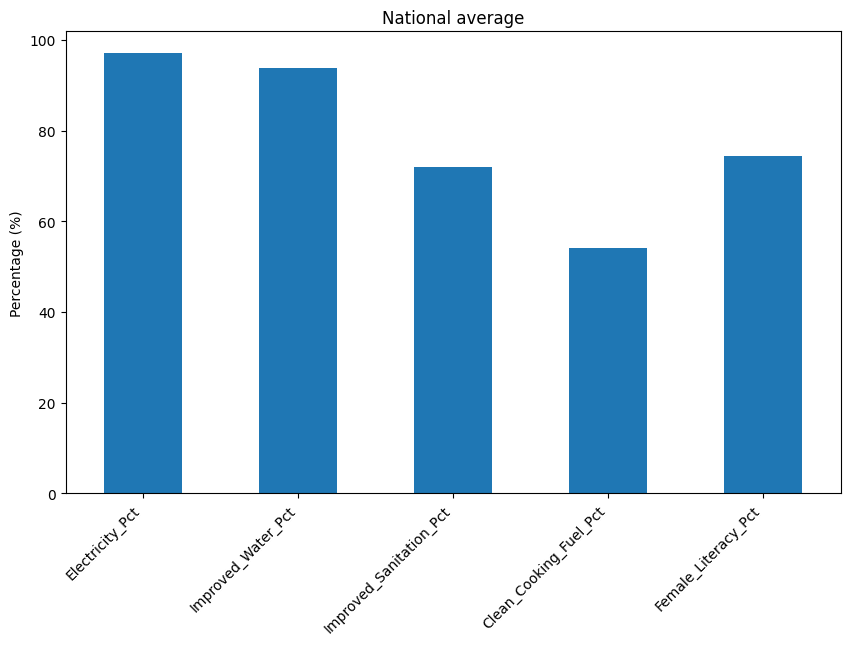

In [ ]:
plt.figure(figsize=(10, 6))
national_avg.plot(kind='bar')
plt.title("National average")
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45,ha='right')
plt.show()

This shows a simple mean of the district level percentages and not a population weighted national average, which would be more accurate.

# State level summary

In [ ]:
state_level = df_selected.groupby('State/UT')[cols_to_convert].mean().reset_index()
state_level.head()

,State/UT,Electricity_Pct,Improved_Water_Pct,Improved_Sanitation_Pct,Clean_Cooking_Fuel_Pct,Female_Literacy_Pct
0,Lakshadweep,99.800000,92.900000,99.800000,59.400000,96.500000
1,Andaman & Nicobar Islands,96.900000,96.300000,86.400000,70.033333,86.066667
2,Andhra Pradesh,99.484615,96.353846,76.700000,82.869231,67.646154
3,Arunachal Pradesh,94.865000,94.280000,84.540000,52.280000,73.100000
4,Assam,93.157576,85.430303,70.109091,39.927273,77.403030


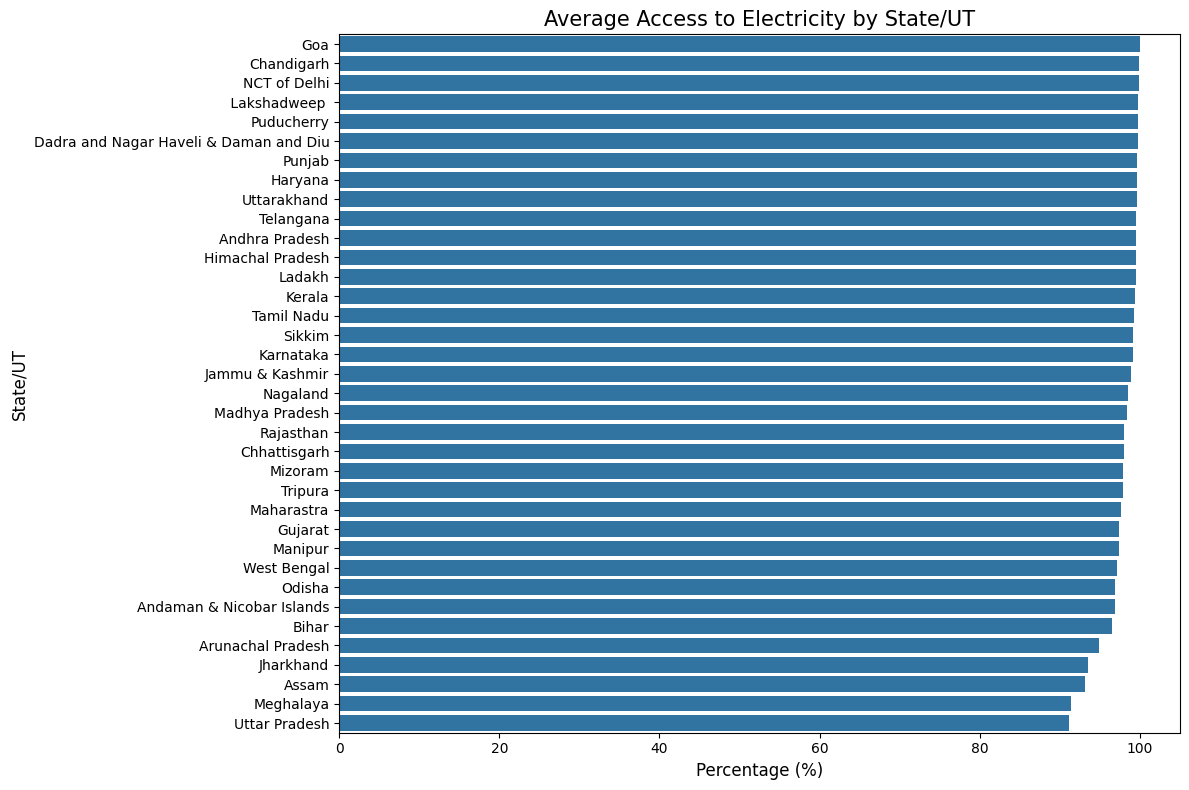

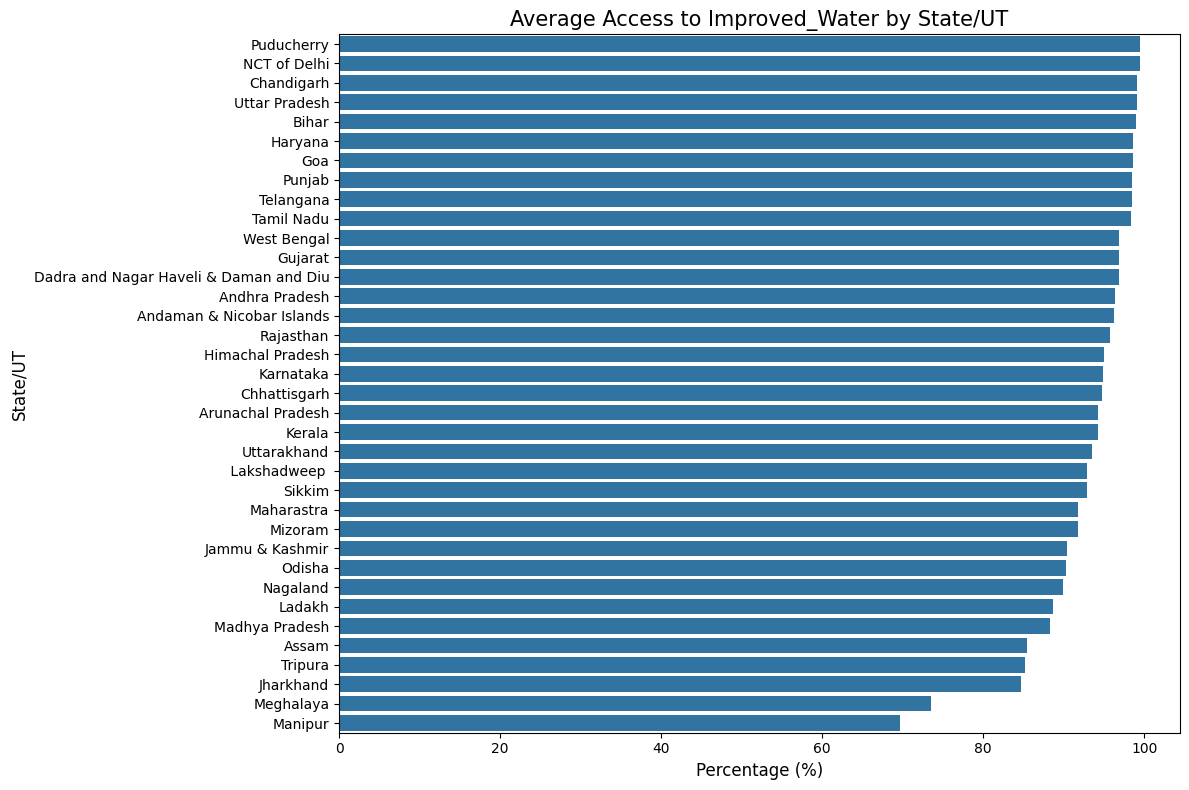

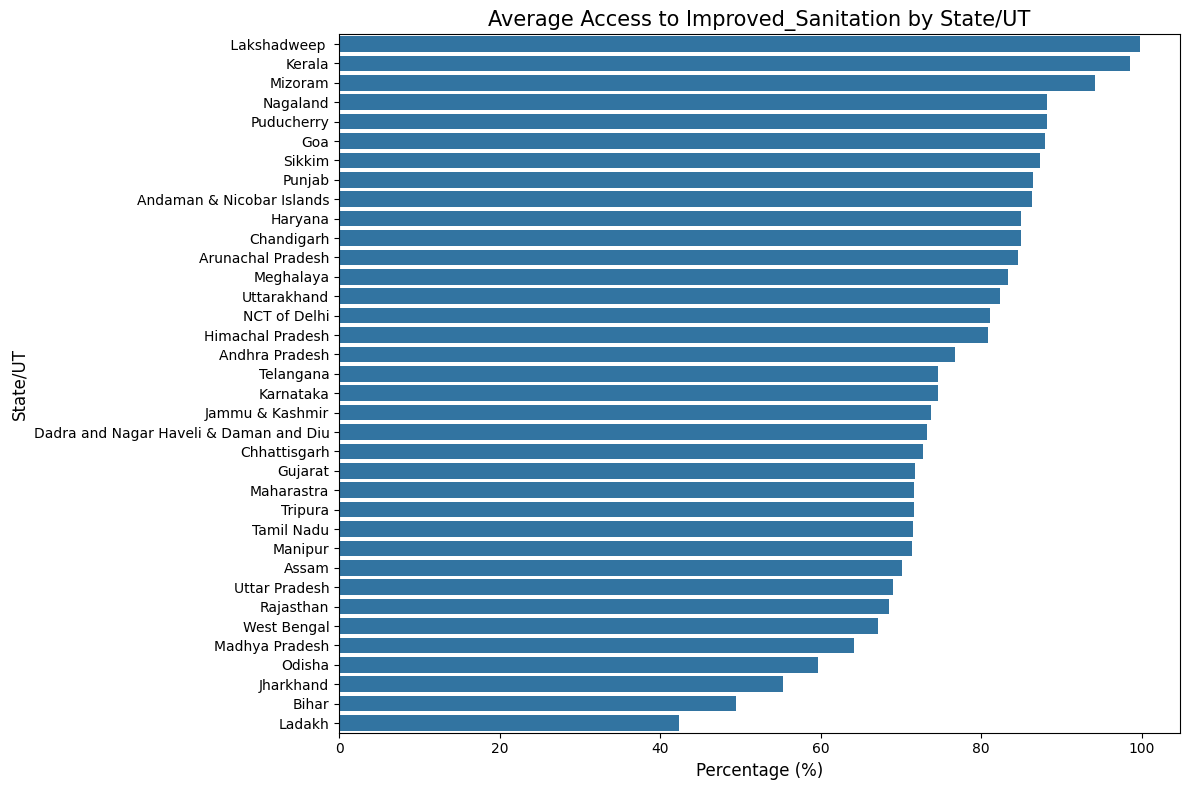

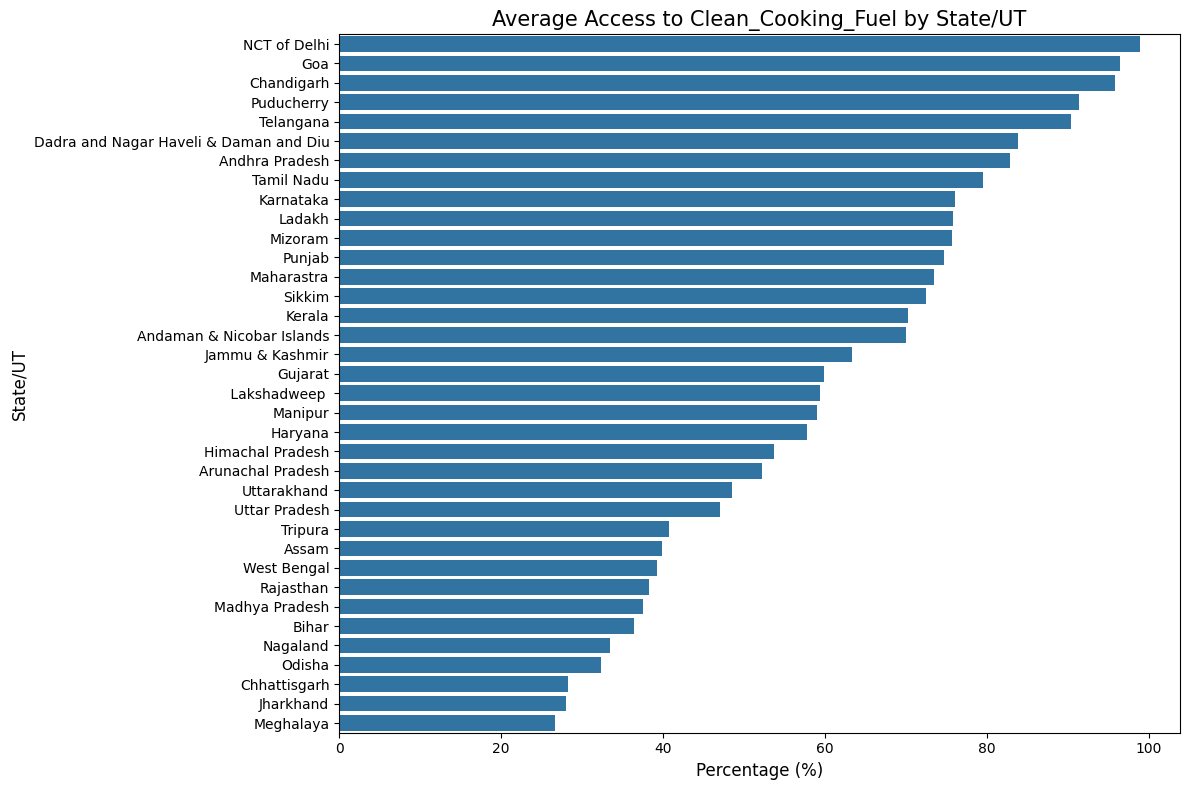

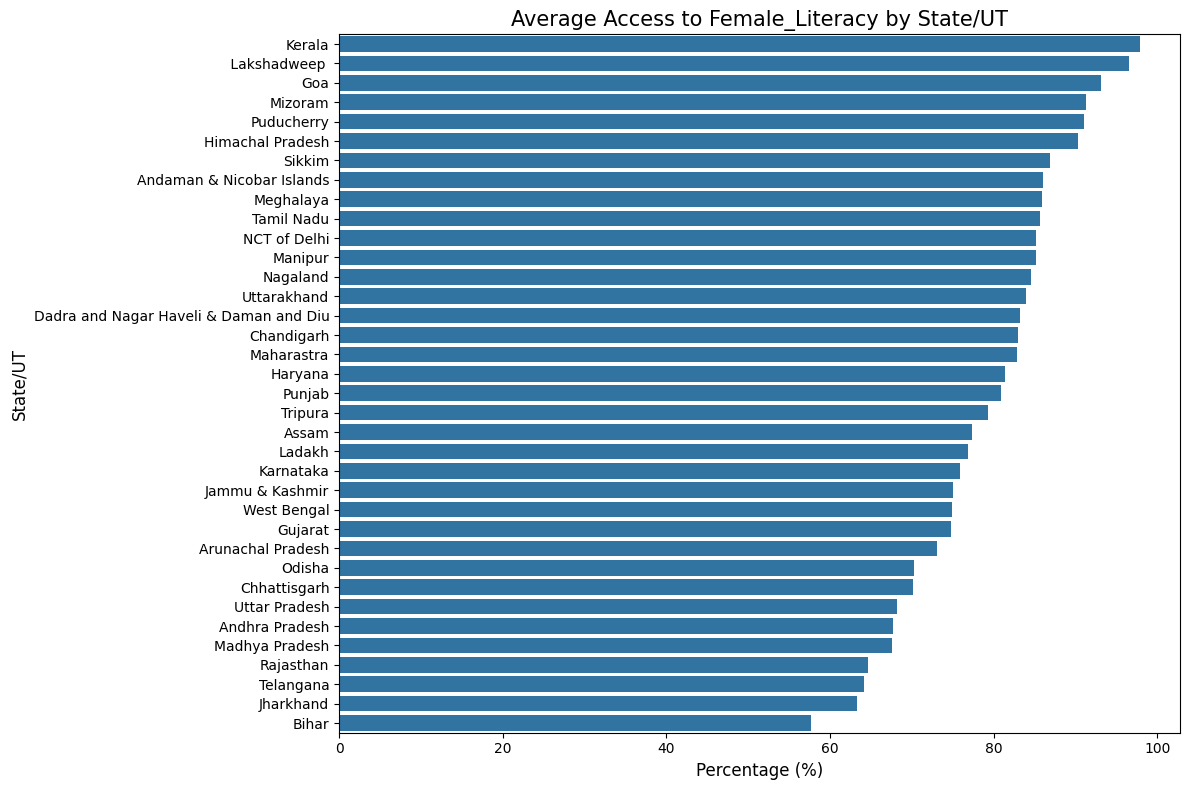

In [ ]:
for col in cols_to_convert:
    plt.figure(figsize=(12, 8))
    sorted_states = state_level.sort_values(by=col, ascending=False)
    sns.barplot(data=sorted_states, x=col, y='State/UT')
    plt.title(f'Average Access to {col.replace("_Pct", "")} by State/UT', fontsize=15)
    plt.xlabel('Percentage (%)', fontsize=12)
    plt.ylabel('State/UT', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
for col in cols_to_convert:
    top_5 = df_selected.sort_values(by=col, ascending=False).head(5)
    bottom_5 = df_selected.sort_values(by=col, ascending=True).head(5)
    print(f"\nTop 5 Districts for {col.replace('_Pct', '')}:")
    print(top_5[['District Names', 'State/UT', col]])
    print(f"\nBottom 5 Districts for {col.replace('_Pct', '')}:")
    print(bottom_5[['District Names', 'State/UT', col]])


Top 5 Districts for Electricity:
                 District Names      State/UT  Electricity_Pct
575         Medchal-Malkajgiri      Telangana            100.0
433                 South West   NCT of Delhi            100.0
434                       West   NCT of Delhi            100.0
478                   Bathinda         Punjab            100.0
472  Shahid Bhagat Singh Nagar         Punjab            100.0

Bottom 5 Districts for Electricity:
          District Names       State/UT  Electricity_Pct
617             Sitapur   Uttar Pradesh             68.4
618              Hardoi   Uttar Pradesh             71.0
642           Shrawasti   Uttar Pradesh             73.7
638          Bara Banki   Uttar Pradesh             74.8
403  West Jaintia Hills       Meghalaya             75.4

Top 5 Districts for Improved_Water:
      District Names           State/UT  Improved_Water_Pct
24    Dibang Valley   Arunachal Pradesh               100.0
646           Basti       Uttar Pradesh             

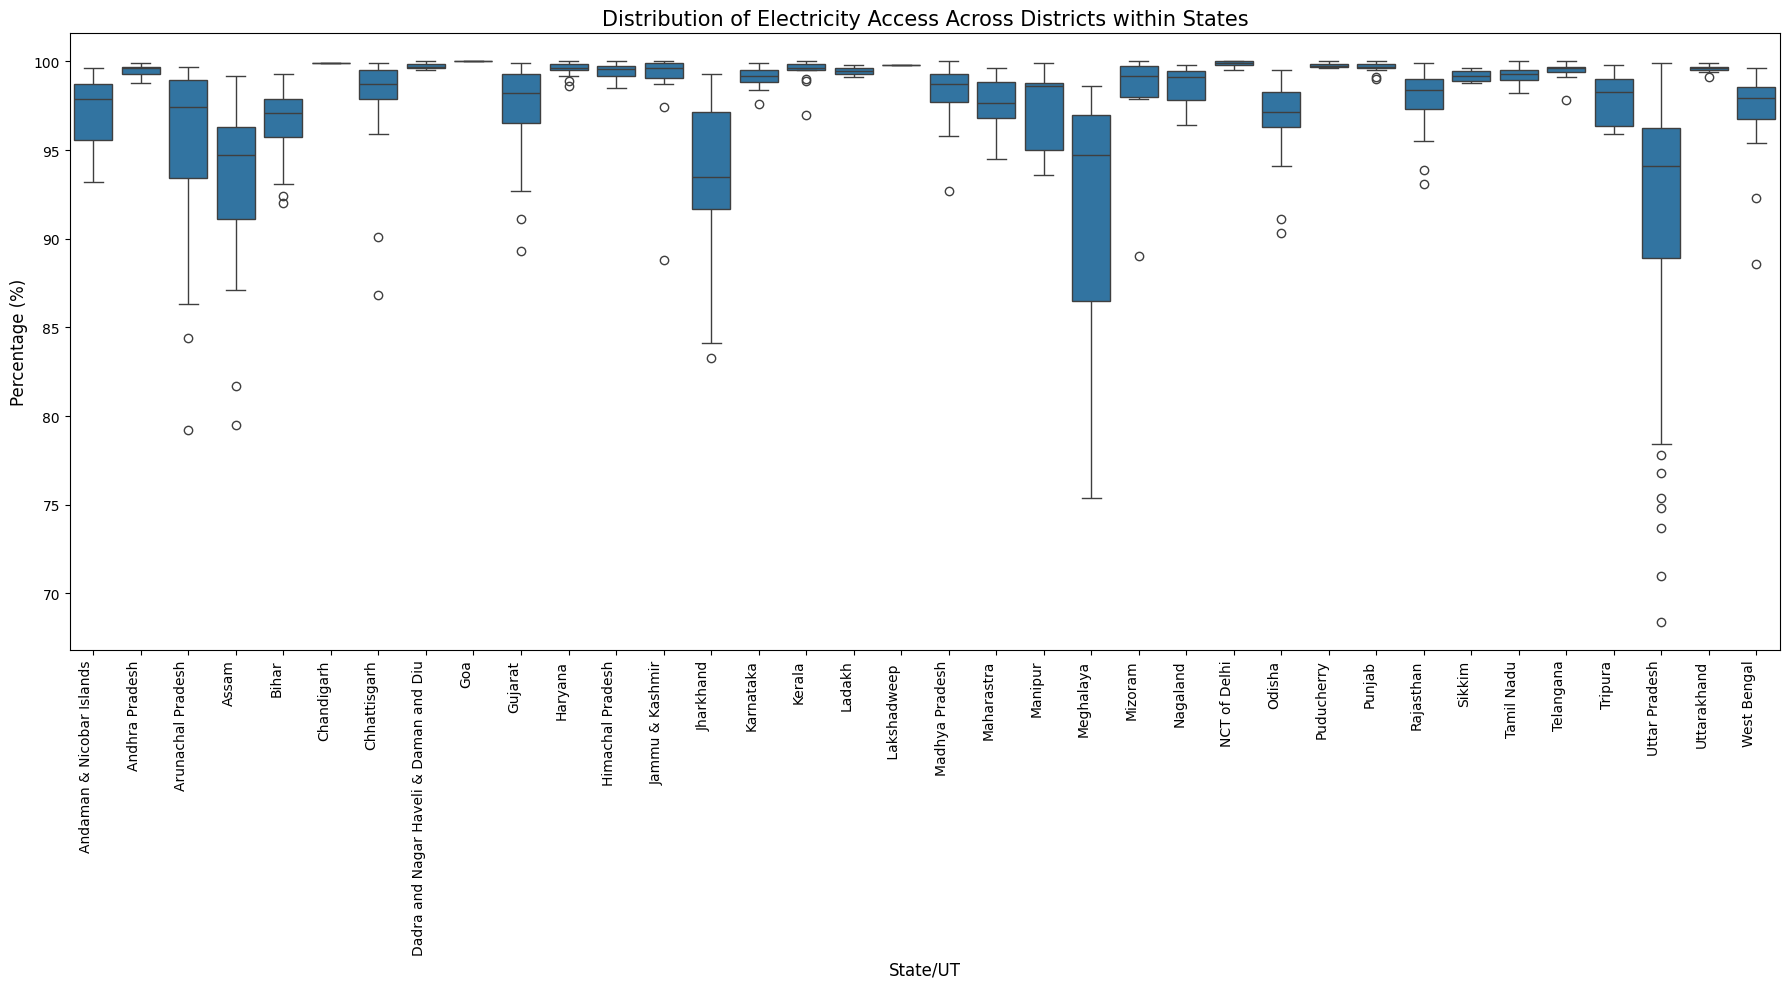

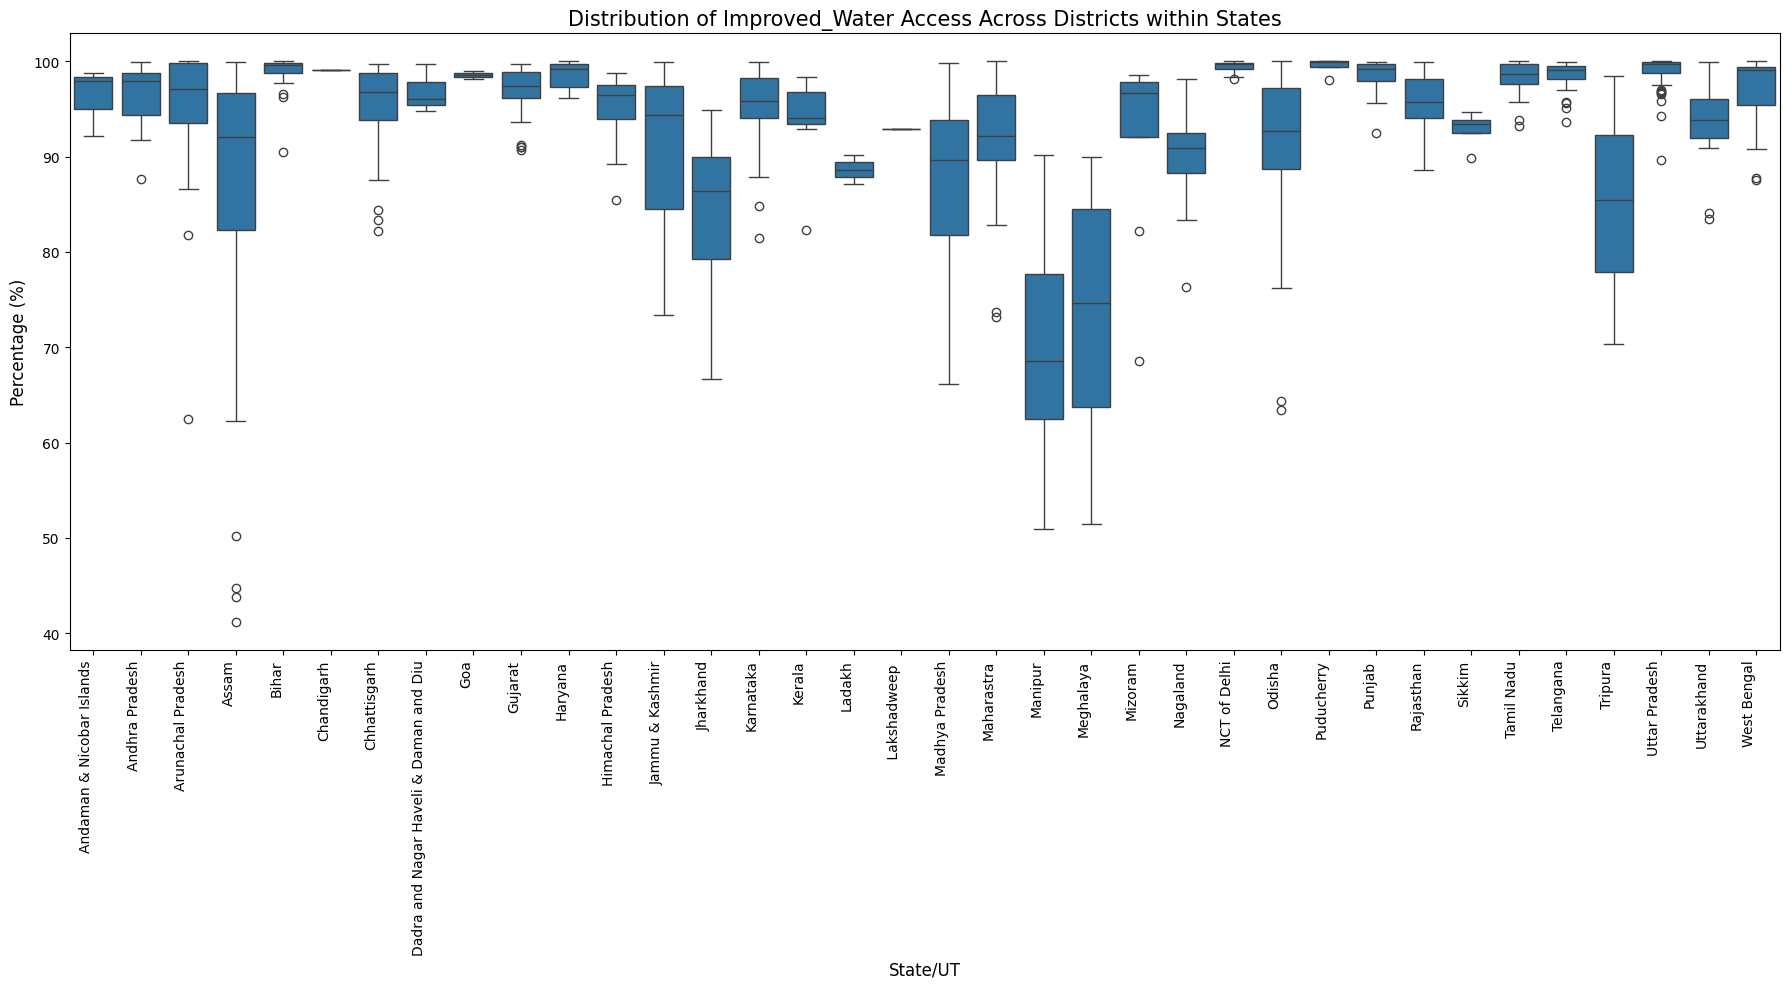

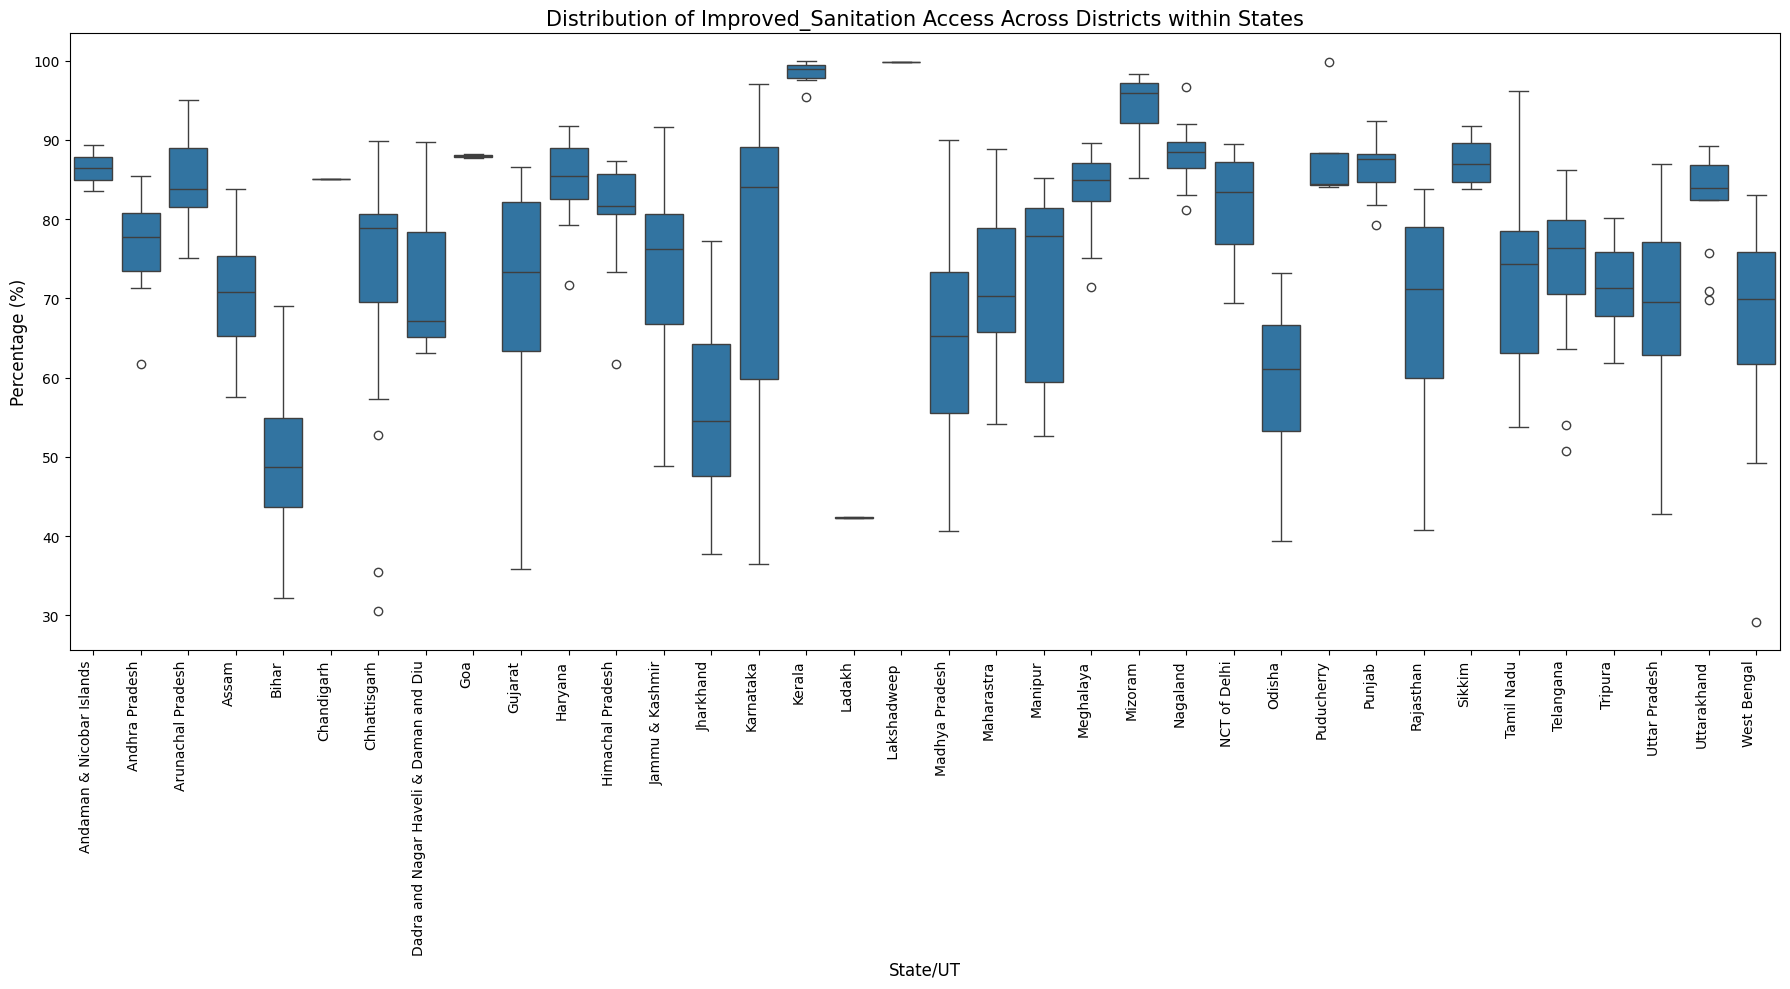

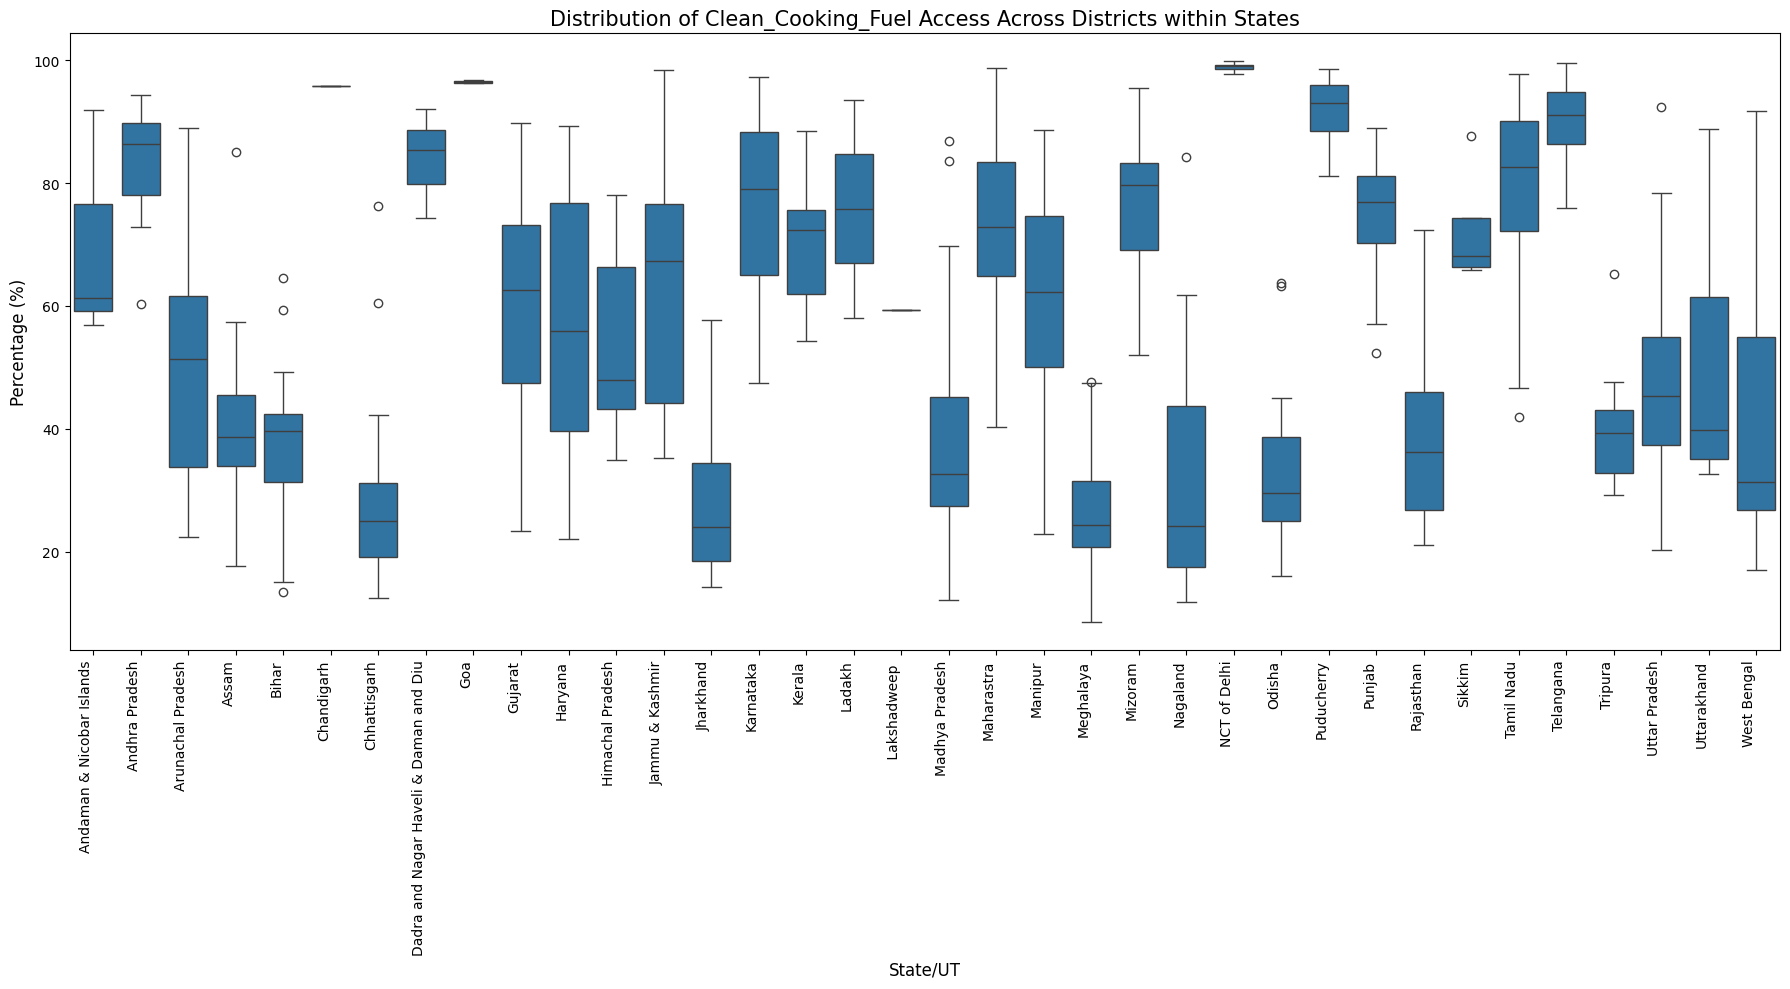

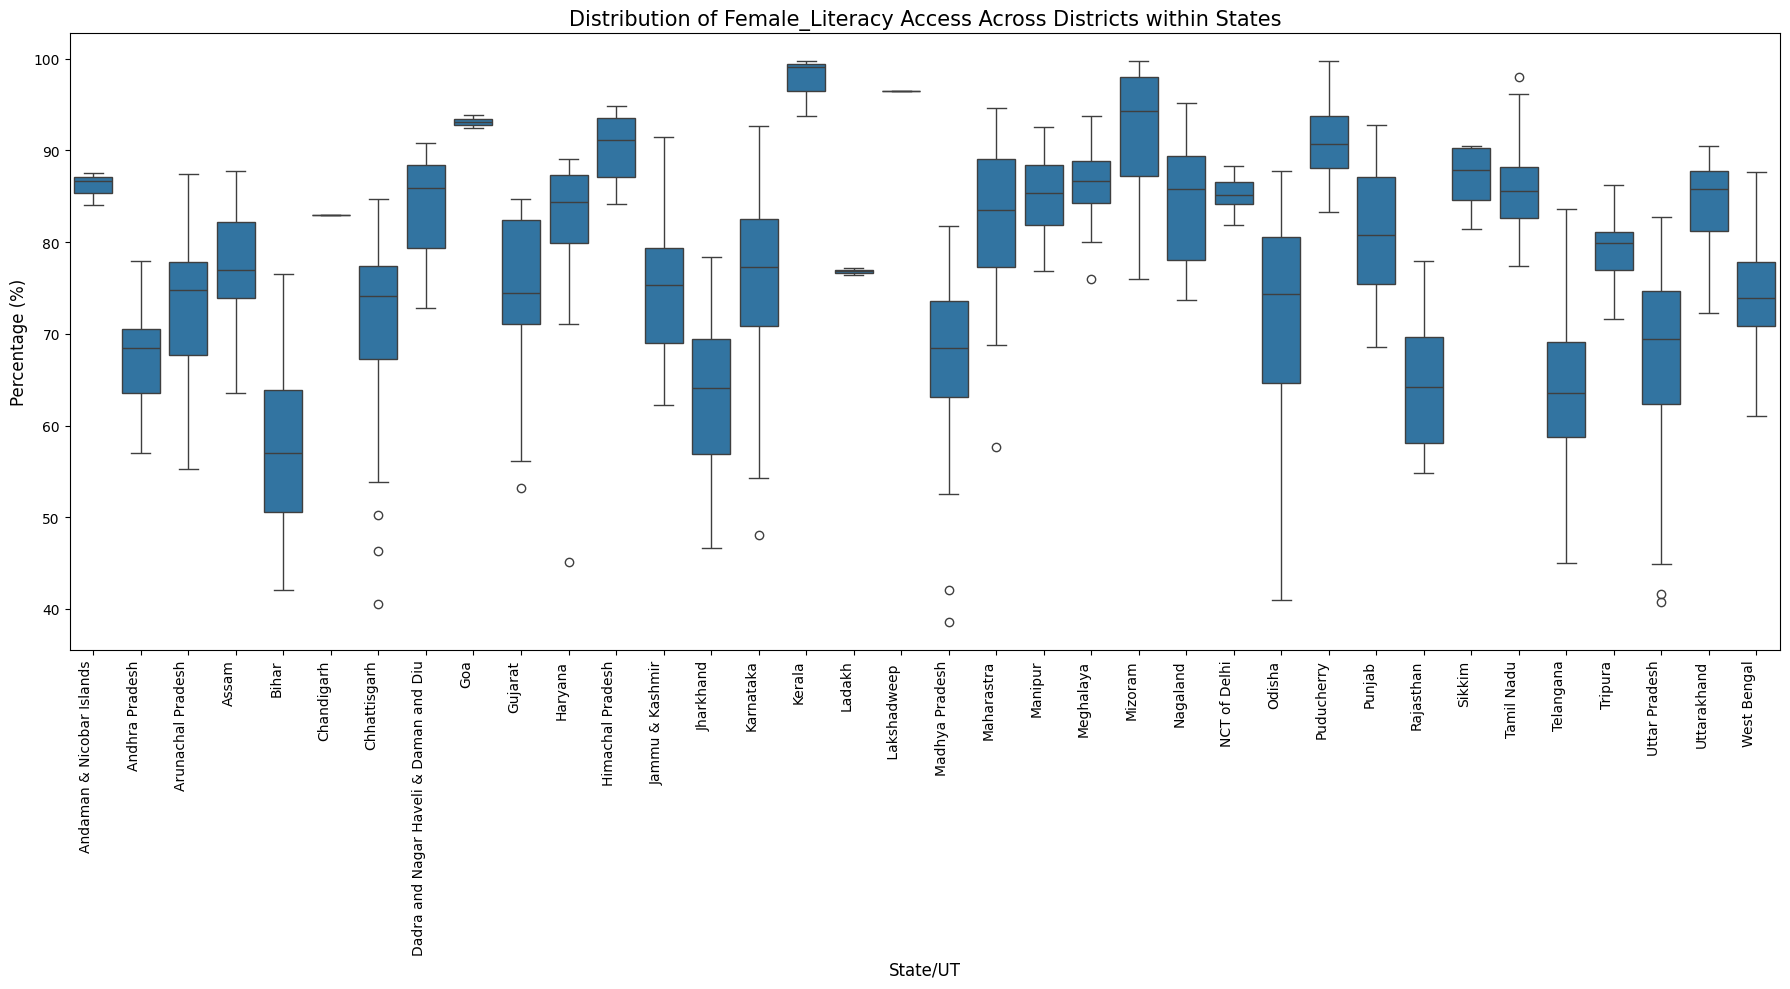

In [ ]:
for col in cols_to_convert:
    plt.figure(figsize=(18, 10))
    sns.boxplot(data=df_selected, x='State/UT', y=col)
    plt.title(f'Distribution of {col.replace("_Pct", "")} Access Across Districts within States', fontsize=15)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('State/UT', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Correlation Analysis

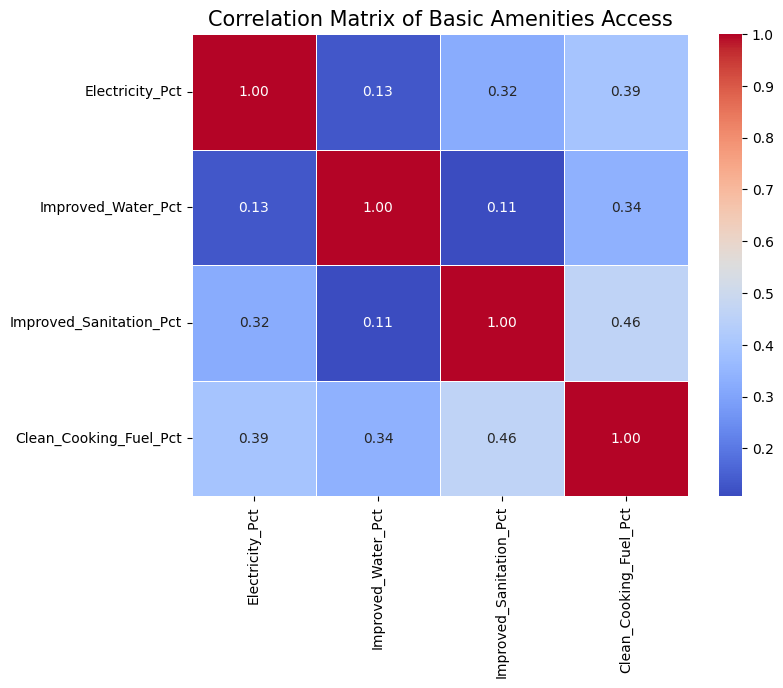

In [ ]:
amenity_corr_matrix = df_selected[cols_to_convert[:-1]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(amenity_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Basic Amenities Access', fontsize=15)
plt.show()

# Correlation of amenities with female literacy

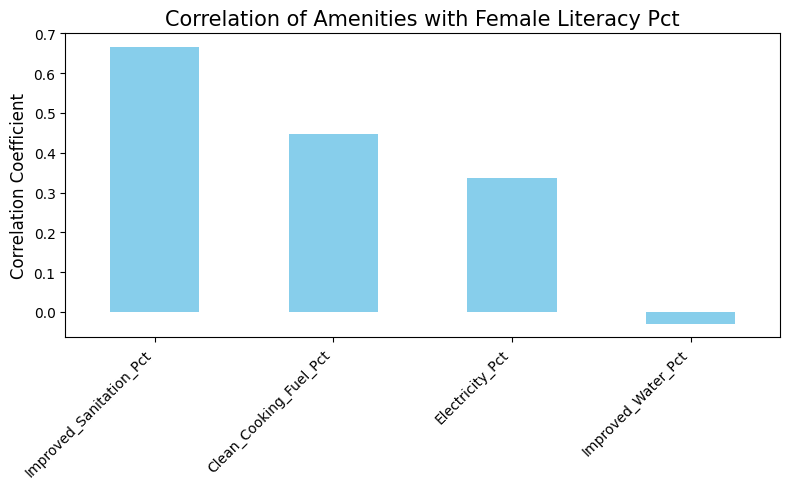

In [ ]:
literacy_correlation = df_selected[cols_to_convert].corr()['Female_Literacy_Pct'].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
literacy_correlation.drop('Female_Literacy_Pct').plot(kind='bar', color='skyblue') # Drop self-correlation
plt.title('Correlation of Amenities with Female Literacy Pct', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data shows a strong positive correlation between female literacy and access to improved sanitation and a moderate one with clean cooking fuel. This makes sense. Literate women are likely more aware of health benefits and may have more say in household decisions.

The link with electricity access is weaker, probably because electricity is more of a top-down effort. While literacy may help in making better use of it, access itself isn’t as directly influenced by it.

Surprisingly, there’s almost no correlation between female literacy and improved water. One reason could be that most districts already have some form of improved water like public taps or protected wells due to government efforts, so there’s little variation for literacy to explain. Also, water is a basic need, so access might be driven more by necessity than by literacy levels

We also do need to keep in mind that correlation is not causation.

## District profiling using K-means

In [ ]:
amenity_features_for_clustering = [
    'Electricity_Pct',
    'Improved_Water_Pct',
    'Improved_Sanitation_Pct',
    'Clean_Cooking_Fuel_Pct'
]
df_cluster_data = df_selected[['District Names', 'State/UT'] + amenity_features_for_clustering].copy()

In [ ]:
for col in amenity_features_for_clustering:
    mean_val = df_cluster_data[col].mean()
    df_cluster_data[col] = df_cluster_data[col].fillna(mean_val)

X_cluster = df_cluster_data[amenity_features_for_clustering]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
X_scaled_df = pd.DataFrame(X_scaled, columns=amenity_features_for_clustering)

X_scaled_df.head()

,Electricity_Pct,Improved_Water_Pct,Improved_Sanitation_Pct,Clean_Cooking_Fuel_Pct
0,0.206642,0.582146,0.811196,0.116218
1,-0.874185,-0.175760,1.014367,0.298323
2,0.597579,0.478795,1.217538,1.564778
3,0.666568,-0.692513,-0.022504,0.852915
4,0.574583,-0.072409,-0.716087,0.256936


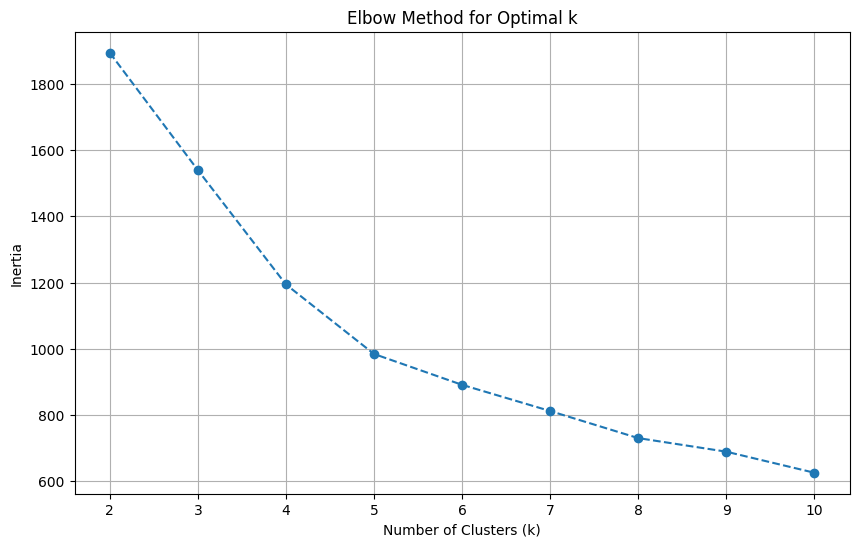

In [ ]:
#Elbow Method
wcss = []
k_range = range(2, 11)
for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow.fit(X_scaled_df)
    wcss.append(kmeans_elbow.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

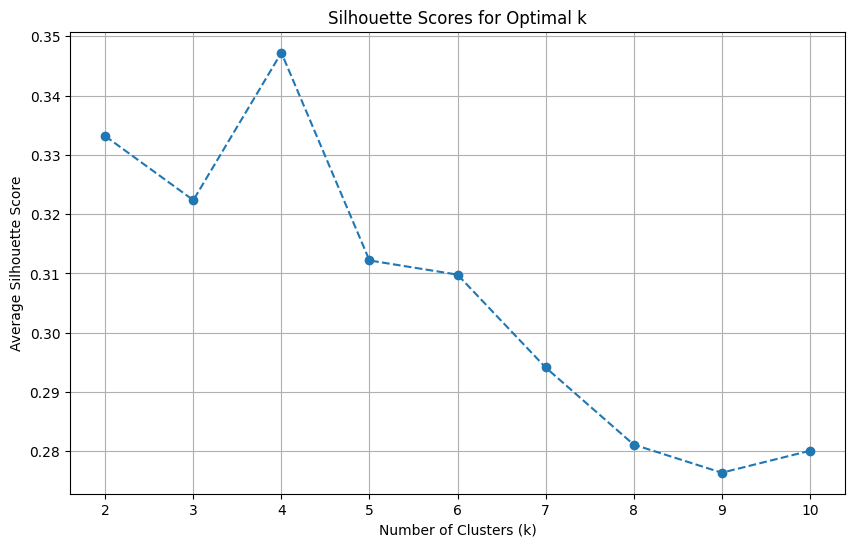

In [ ]:
#Silhouette Score
silhouette_scores = []
for i in k_range:
    kmeans_silhouette = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    cluster_labels = kmeans_silhouette.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [50]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
df_cluster_data['Cluster'] = kmeans_final.fit_predict(X_scaled_df)

print("\nCluster distribution:")
df_cluster_data['Cluster'].value_counts().sort_index()


Cluster distribution:


,count
Cluster,
0,313
1,277
2,46
3,71


In [51]:
df_cluster_data.head()

,District Names,State/UT,Electricity_Pct,Improved_Water_Pct,Improved_Sanitation_Pct,Clean_Cooking_Fuel_Pct,Cluster
0,Nicobars,Andaman & Nicobar Islands,97.9,98.8,83.5,56.9,0
1,North & Middle Andaman,Andaman & Nicobar Islands,93.2,92.2,86.4,61.3,0
2,South Andaman,Andaman & Nicobar Islands,99.6,97.9,89.3,91.9,0
3,Srikakulam,Andhra Pradesh,99.9,87.7,71.6,74.7,0
4,Vizianagaram,Andhra Pradesh,99.5,93.1,61.7,60.3,1



Cluster Characteristics per Cluster

Cluster Profiles:
   Cluster  Electricity_Pct  Improved_Water_Pct  Improved_Sanitation_Pct  \
0        0        99.119169           97.011182                80.729393   
1        1        96.931408           95.185199                64.227437   
2        2        84.065217           94.419565                64.815217   
3        3        96.319718           73.146479                67.711268   

   Clean_Cooking_Fuel_Pct  
0               76.519169  
1               36.546570  
2               36.326087  
3               35.184507  


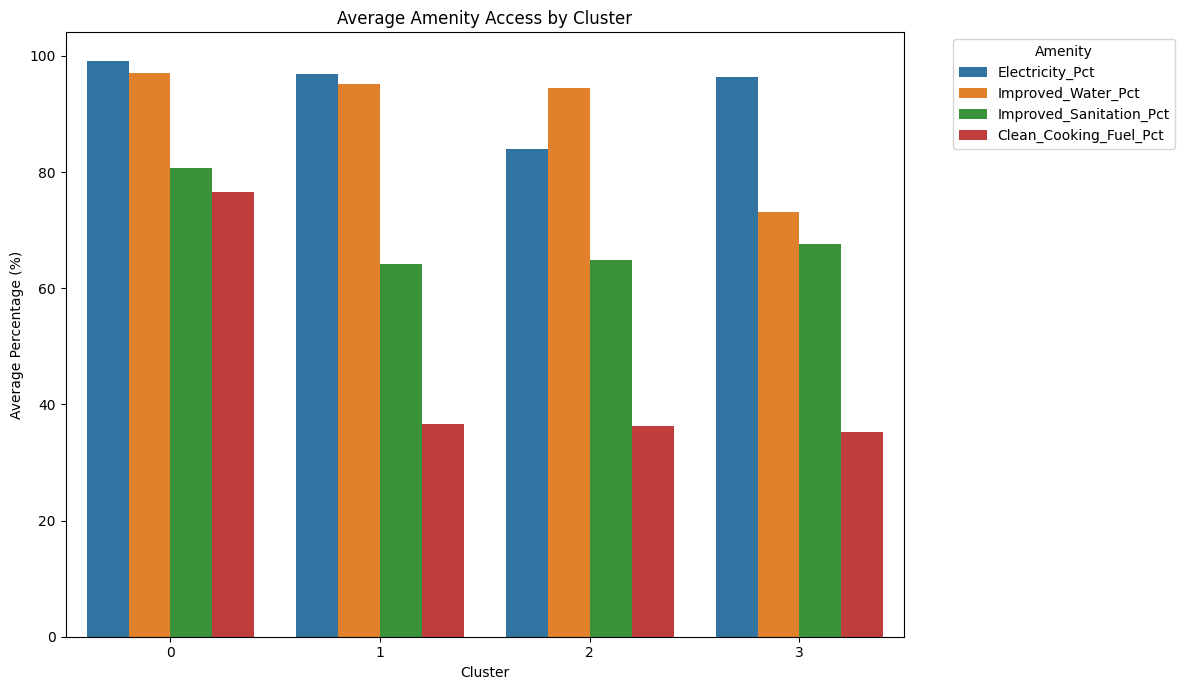

In [52]:
print(f"\nCluster Characteristics per Cluster")
cluster_summary = df_cluster_data.groupby('Cluster')[amenity_features_for_clustering].mean().reset_index()

df_selected_with_clusters = df_selected.copy()
df_selected_with_clusters = df_selected_with_clusters.iloc[df_cluster_data.index]
df_selected_with_clusters['Cluster'] = df_cluster_data['Cluster']

for col in amenity_features_for_clustering:
    if df_selected_with_clusters[col].isnull().any():
        mean_val_orig = df_selected_with_clusters[col].mean()
        df_selected_with_clusters[col].fillna(mean_val_orig, inplace=True)

cluster_profile = df_selected_with_clusters.groupby('Cluster')[amenity_features_for_clustering].mean().reset_index()

print("\nCluster Profiles:")
print(cluster_profile)

cluster_profile_melted = cluster_profile.melt(id_vars='Cluster', var_name='Amenity', value_name='Average_Access_Pct')

plt.figure(figsize=(12, 7))
sns.barplot(data=cluster_profile_melted, x='Cluster', y='Average_Access_Pct', hue='Amenity')
plt.title('Average Amenity Access by Cluster')
plt.ylabel('Average Percentage (%)')
plt.legend(title='Amenity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

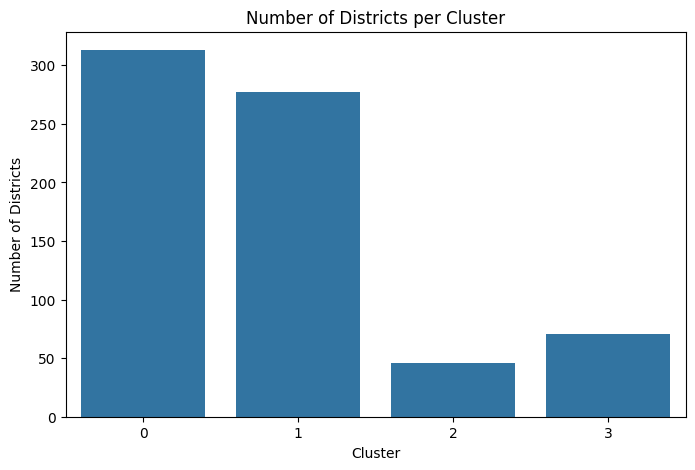

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cluster_data, x='Cluster')
plt.title('Number of Districts per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Districts')
plt.show()

In [54]:
centroids_scaled = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_scaled)

df_centroids = pd.DataFrame(centroids_original_scale, columns=amenity_features_for_clustering)
df_centroids['Cluster'] = range(optimal_k)
df_centroids.set_index('Cluster', inplace=True)

df_centroids.head()

,Electricity_Pct,Improved_Water_Pct,Improved_Sanitation_Pct,Clean_Cooking_Fuel_Pct
Cluster,,,,
0,99.119169,97.011182,80.729393,76.519169
1,96.931408,95.185199,64.227437,36.546570
2,84.065217,94.419565,64.815217,36.326087
3,96.319718,73.146479,67.711268,35.184507


Access to electricity and improved water is higher across clusters than access to sanitation and clean cooking fuel. This highlights that a one-size fits all policy is not sufficient.

**cluster 0**: these exhibit comparitively higher access to all four amenities. the policies here should focus on maintaining the current infrastructure and reaching the very last few unreached households and improving the quality of services.

**cluster 1**: while basic electricity and water is well established, there's a clear gap in sanitation and over reliance on traditional cooking fuels. government policies for LPG, sanitation would be particularly relevant for such districts. challenges might include affordability or behavioral change for cleaner fuels and sanitation practices.

**cluster 2**: they have high access to improved even slightly above cluster 0. however, it has loweset average electricity access. lower electricity solutions might also be impacting other aspects of development.

**cluster 3**: they have high electricity access. however, they also have the lowest average access to improved water. government policies specifically for improved water can be focused here, alongwith clean cooking fuel.


The geographical and socio-economic conditions of the clusters would have to be thoroughly analysed to ensure better access to amenities for all clusters.